In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import os
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import json
pd.set_option("display.max_columns", None)
import pickle
import datetime as dt

In [ ]:
!pip3 install pickle5
import pickle5 as pickle


Loading data

In [ ]:
with open('/content/gdrive/MyDrive/yelp_dataset/business_df.pkl', "rb") as fh:
  business_df = pickle.load(fh)

with open('/content/gdrive/MyDrive/yelp_dataset/user_df.pkl', "rb") as f1:
  user_df = pickle.load(f1)

with open('/content/gdrive/MyDrive/yelp_dataset/reviews_df.pkl', "rb") as f2:
  reviews_df = pickle.load(f2)

with open('/content/gdrive/MyDrive/yelp_dataset/final_df.pkl', "rb") as f3:
  final_df = pickle.load(f3)

Checking the data

In [ ]:
print(f'Cleaned business df shape: {business_df.shape}')
print(f'Cleaned users df shape: {user_df.shape}')
print(f'Reviews df shape: {reviews_df.shape}')

Cleaned business df shape: (41768, 58)
Cleaned users df shape: (2189457, 22)
Reviews df shape: (4725630, 9)


**Business data**: <br>
Consists restaurants which are currently open

In [ ]:
business_df.head()

business_id                      name              address       city  \
0            0       Oskar Blues Taproom         921 Pearl St    Boulder   
1            1   Flying Elephants at PDX  7000 NE Airport Way   Portland   
2            2       Bob Likes Thai Food         3755 Main St  Vancouver   
3            3           Boxwood Biscuit        740 S High St   Columbus   
4            4  Chautauqua General Store      100 Clematis Dr    Boulder   

  state postal_code   latitude   longitude  stars  review_count  is_open  \
0    CO       80302  40.017544 -105.283348    4.0            86        1   
1    OR       97218  45.588906 -122.593331    4.0           126        1   
2    BC         V5V  49.251342 -123.101333    3.5           169        1   
3    OH       43206  39.947007  -82.997471    4.5            11        1   
4    CO       80302  39.998449 -105.281006    3.5             5        1   

                                          categories  RestaurantsTableService  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...                     True   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...                    False   
2                                  Restaurants, Thai                    False   
3                    Breakfast & Brunch, Restaurants                    False   
4  Food, Shopping, Convenience Stores, Souvenir S...                    False   

    WiFi  BikeParking  BusinessParking  BusinessAcceptsCreditCards  \
0   True         True             True                        True   
1   True         True             True                        True   
2   True         True             True                       False   
3  False        False            False                       False   
4  False         True             True                        True   

   RestaurantsReservations  WheelchairAccessible  Caters  OutdoorSeating  \
0                     True                  True    True            True   
1                     True                 False    True            True   
2                     True                 False    True            True   
3                    False                 False   False           False   
4                    False                  True    True           False   

   RestaurantsGoodForGroups  HappyHour  BusinessAcceptsBitcoin  \
0                      True       True                    True   
1                      True      False                   False   
2                      True      False                   False   
3                     False      False                   False   
4                     False      False                    True   

   RestaurantsPriceRange2  Ambience  HasTV  Alcohol  GoodForMeal  DogsAllowed  \
0                    True      True   True     True         True         True   
1                    True      True   True     True         True        False   
2                    True      True   True     True         True         True   
3                   False     False  False    False        False        False   
4                   False     False  False    False        False         True   

   RestaurantsTakeOut  NoiseLevel  RestaurantsAttire  RestaurantsDelivery  \
0                True        True               True                 True   
1                True        True               True                 True   
2                True        True               True                 True   
3               False       False              False                False   
4                True       False              False                 True   

   GoodForKids  ByAppointmentOnly  Music  GoodForDancing  BestNights   BYOB  \
0        False              False  False           False       False  False   
1         True               True  False           False       False  False   
2         True              False  False           False       False  False   
3        False              False  False           False     

In [ ]:
#checking for null values
business_df.isnull().sum()

business_id                      0
name                             0
address                          0
city                             0
state                            0
postal_code                      0
latitude                         0
longitude                        0
stars                            0
review_count                     0
is_open                          0
categories                       0
RestaurantsTableService          0
WiFi                             0
BikeParking                      0
BusinessParking                  0
BusinessAcceptsCreditCards       0
RestaurantsReservations          0
WheelchairAccessible             0
Caters                           0
OutdoorSeating                   0
RestaurantsGoodForGroups         0
HappyHour                        0
BusinessAcceptsBitcoin           0
RestaurantsPriceRange2           0
Ambience                         0
HasTV                            0
Alcohol                          0
GoodForMeal         

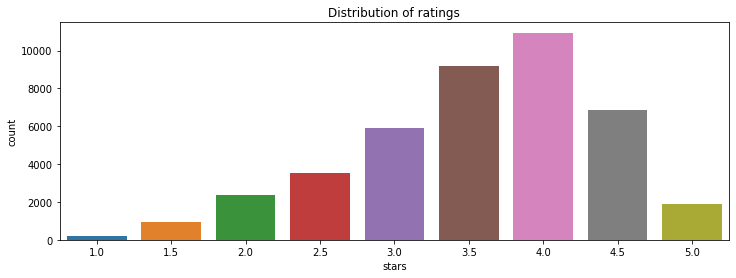

In [ ]:
#distribution of ratings
plt.figure(figsize=(12,4))
ax = sns.countplot(business_df['stars'])
plt.title('Distribution of ratings');

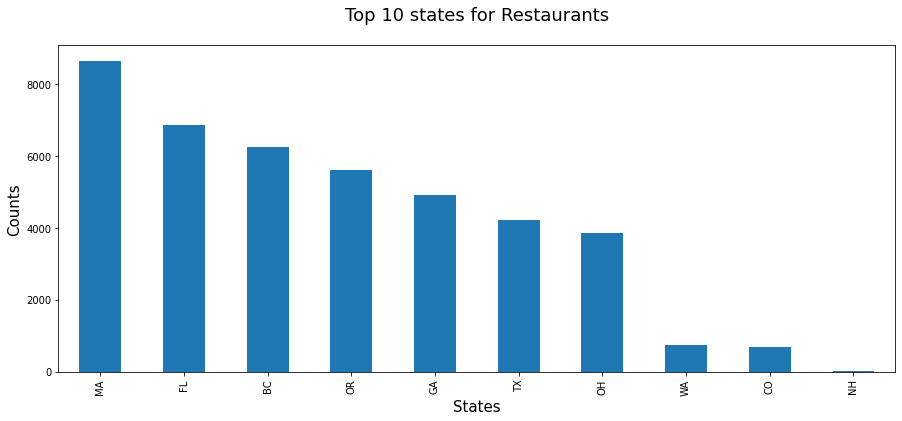

In [ ]:
plt.figure(figsize=(15,6))
business_df['state'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 states for Restaurants',fontsize=18, pad=25.0) 
plt.xlabel('States', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Massachusetts has the most number of restaurants followed by it is florida as seen in the above graph.

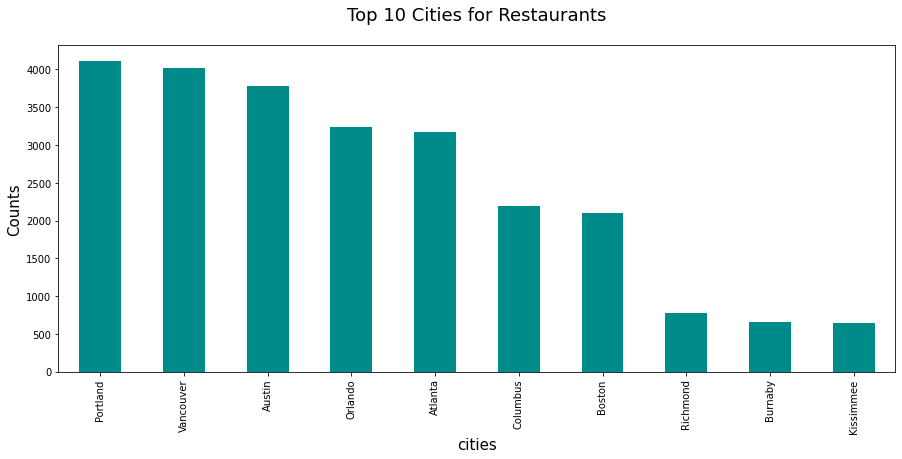

In [ ]:
plt.figure(figsize=(15,6))
business_df['city'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar',color='Darkcyan')
plt.title('Top 10 Cities for Restaurants',fontsize=18, pad=25.0) 
plt.xlabel('cities', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

We see that the city portland has the highest number of restaurants. The above plot depicts the top 10 cities based on the number of restaurants


***Choose a city to get the all the restaurants in that city plotted on a map***

In [ ]:
#vizualization of the restaurants locations on a map
filter_data = input('select the city to view the restaurants in that city: ')
print("\n")
business_df_city=business_df[business_df['city']==filter_data]
import folium
business_locations = business_df_city[["latitude", "longitude", "name"]]
map = folium.Map(location=[business_locations.latitude.mean(), business_locations.longitude.mean()], zoom_start=14, control_scale=True)

for index, location_info in business_locations.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["name"]).add_to(map)

map

select the city to view the restaurants in that city: Boston




In [ ]:
business_df.head()

business_id                      name              address       city  \
0            0       Oskar Blues Taproom         921 Pearl St    Boulder   
1            1   Flying Elephants at PDX  7000 NE Airport Way   Portland   
2            2       Bob Likes Thai Food         3755 Main St  Vancouver   
3            3           Boxwood Biscuit        740 S High St   Columbus   
4            4  Chautauqua General Store      100 Clematis Dr    Boulder   

  state postal_code   latitude   longitude  stars  review_count  is_open  \
0    CO       80302  40.017544 -105.283348    4.0            86        1   
1    OR       97218  45.588906 -122.593331    4.0           126        1   
2    BC         V5V  49.251342 -123.101333    3.5           169        1   
3    OH       43206  39.947007  -82.997471    4.5            11        1   
4    CO       80302  39.998449 -105.281006    3.5             5        1   

                                          categories  RestaurantsTableService  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...                     True   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...                    False   
2                                  Restaurants, Thai                    False   
3                    Breakfast & Brunch, Restaurants                    False   
4  Food, Shopping, Convenience Stores, Souvenir S...                    False   

    WiFi  BikeParking  BusinessParking  BusinessAcceptsCreditCards  \
0   True         True             True                        True   
1   True         True             True                        True   
2   True         True             True                       False   
3  False        False            False                       False   
4  False         True             True                        True   

   RestaurantsReservations  WheelchairAccessible  Caters  OutdoorSeating  \
0                     True                  True    True            True   
1                     True                 False    True            True   
2                     True                 False    True            True   
3                    False                 False   False           False   
4                    False                  True    True           False   

   RestaurantsGoodForGroups  HappyHour  BusinessAcceptsBitcoin  \
0                      True       True                    True   
1                      True      False                   False   
2                      True      False                   False   
3                     False      False                   False   
4                     False      False                    True   

   RestaurantsPriceRange2  Ambience  HasTV  Alcohol  GoodForMeal  DogsAllowed  \
0                    True      True   True     True         True         True   
1                    True      True   True     True         True        False   
2                    True      True   True     True         True         True   
3                   False     False  False    False        False        False   
4                   False     False  False    False        False         True   

   RestaurantsTakeOut  NoiseLevel  RestaurantsAttire  RestaurantsDelivery  \
0                True        True               True                 True   
1                True        True               True                 True   
2                True        True               True                 True   
3               False       False              False                False   
4                True       False              False                 True   

   GoodForKids  ByAppointmentOnly  Music  GoodForDancing  BestNights   BYOB  \
0        False              False  False           False       False  False   
1         True               True  False           False       False  False   
2         True              False  False           False       False  False   
3        False              False  False           False     

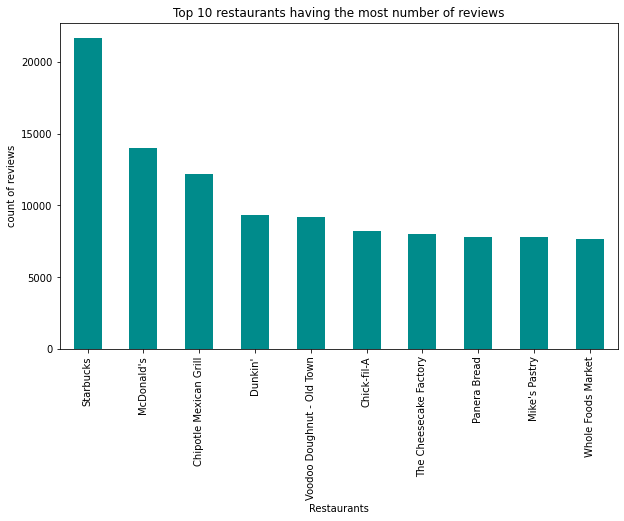

In [ ]:
plt.figure(figsize=(10,6))
(business_df.groupby('name')['review_count'].sum().sort_values(ascending=False)[:10]).plot(kind='bar',color='Darkcyan')
plt.title('Top 10 restaurants having the most number of reviews')
plt.ylabel('count of reviews')
plt.xlabel('Restaurants')
plt.show()

Starbucks has recieved the most reviews. The above plot depicts the top 10 restaurants based on review count.

**Below are the plots based on the trend of stars and review count based on few categories and facilites provide by the restaurants**

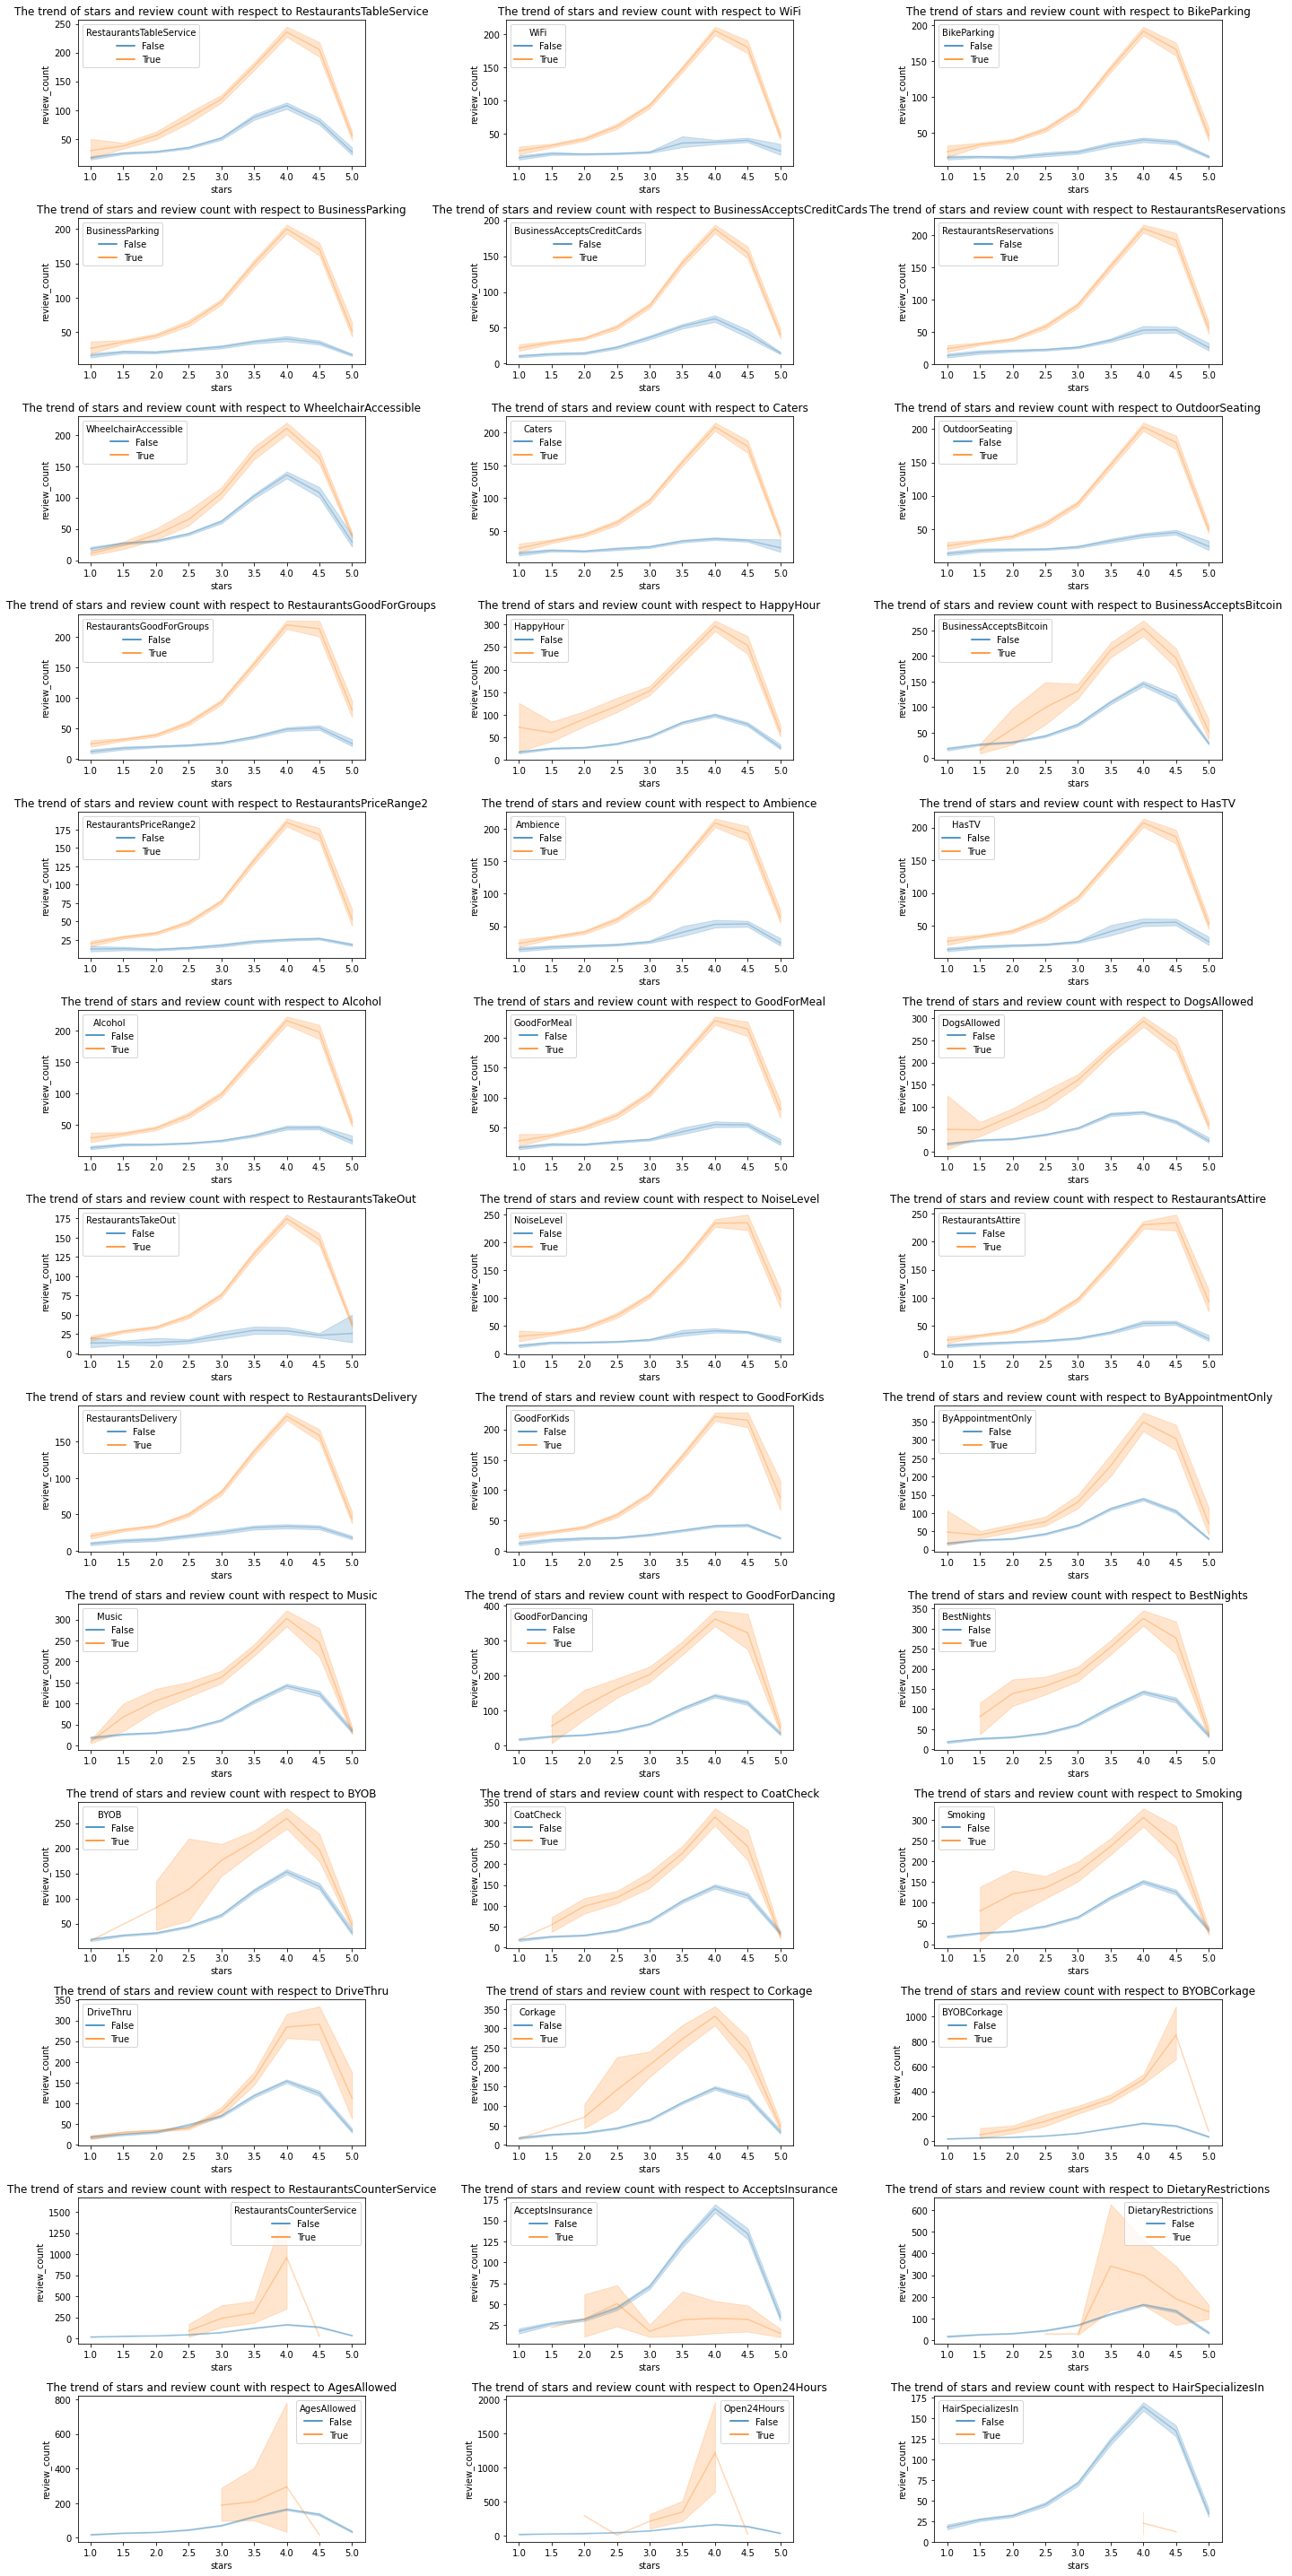

In [ ]:
fig, ax = plt.subplots(13,3,figsize=(20,40))
categories=['RestaurantsTableService',	'WiFi',	'BikeParking',	'BusinessParking'	,'BusinessAcceptsCreditCards',	'RestaurantsReservations'	,'WheelchairAccessible',	'Caters'
	,'OutdoorSeating'	,'RestaurantsGoodForGroups',	'HappyHour',	'BusinessAcceptsBitcoin',	'RestaurantsPriceRange2',	'Ambience'	,'HasTV',	'Alcohol',	'GoodForMeal',
  	'DogsAllowed',	'RestaurantsTakeOut'	,'NoiseLevel'	,'RestaurantsAttire',	'RestaurantsDelivery',	'GoodForKids'	,'ByAppointmentOnly'	,'Music',	'GoodForDancing'
    	,'BestNights'	,'BYOB',	'CoatCheck',	'Smoking',	'DriveThru'	,'Corkage',	'BYOBCorkage',	'RestaurantsCounterService',	'AcceptsInsurance'	,'DietaryRestrictions'	,
      'AgesAllowed',	'Open24Hours'	,'HairSpecializesIn']
i = 0
j = 0
for cat in range(len(categories)):
  sns.lineplot(business_df['stars'],business_df['review_count'],hue=business_df[f'{categories[cat]}'],alpha=0.3,ax=ax[i][j] )
  ax[i][j].set_title(f'The trend of stars and review count with respect to {categories[cat]}')
  j+=1
  if(j is 3):
    i+=1
    j=0
plt.tight_layout()
plt.show()

**Reviews data**

In [ ]:
#checking null values
reviews_df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
reviews_df.head()

review_id  user_id  business_id  stars  useful  funny  cool  \
1   8bFej1QE5LXp4O05qjGqXA        0            0    4.0       1      0     0   
3   T5fAqjjFooT4V0OeZyuk1w        1            1    2.0       1      1     1   
5   J4a2TuhDasjn2k3wWtHZnQ        2            2    1.0       2      0     0   
7   9vqwvFCBG3FBiHGmOHMmiA        3            3    5.0       0      0     0   
12  Gi5LSRmTXoL9Bp4jNGPjLw        4            4    4.0       0      0     0   

                                                 text                date  
1   This store is pretty good. Not as great as Wal... 2015-07-03 20:38:25  
3   I've stayed at many Marriott and Renaissance M... 2010-01-08 02:29:15  
5   This place used to be a cool, chill place. Now... 2018-01-21 04:41:03  
7   Probably one of the better breakfast sandwiche... 2017-12-02 18:16:13  
12  I have been here twice and have had really goo... 2011-10-27 14:32:57

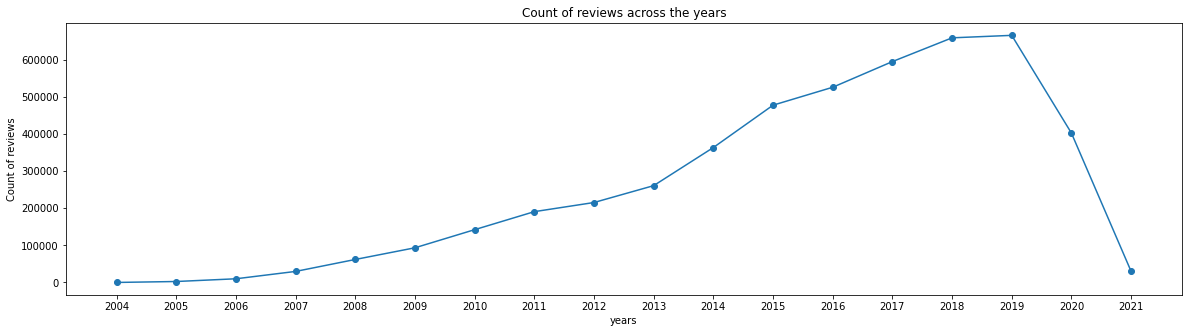

In [ ]:
#Count of reviews across the years
plt.figure(figsize=(20,5))
reviews_df.groupby(reviews_df['date'].dt.year).size().plot(kind='line',marker='o')
plt.xticks(sorted(reviews_df['date'].dt.year.unique()))
plt.xlabel('years')
plt.ylabel('Count of reviews')
plt.title('Count of reviews across the years')
plt.show()

The above plot depicts the trend of count of reviews across the years from 2004 to 2020. We see a exponential increase in the review count from 2004 to 2019 and see a drastic dip in the review count. The pandemic (COVID) could be the reason for such a drastic drop.

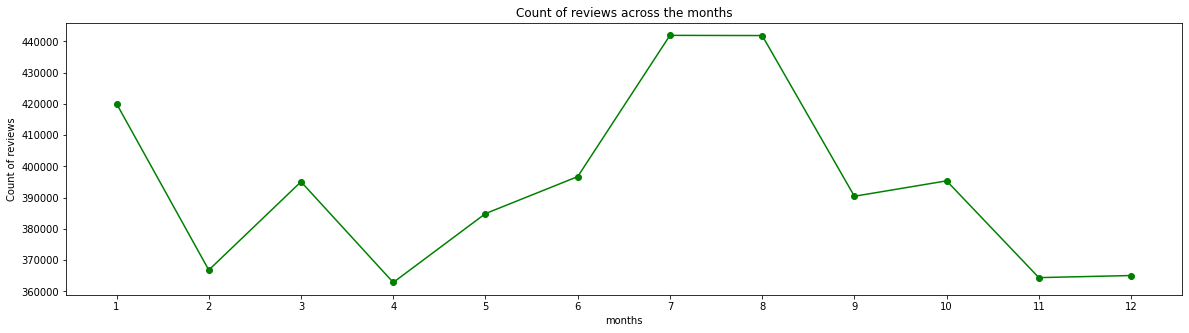

In [ ]:
#Count of reviews across the months
plt.figure(figsize=(20,5))
reviews_df.groupby(reviews_df['date'].dt.month).size().plot(kind='line',marker='o',color='g')
plt.xticks(sorted(reviews_df['date'].dt.month.unique()))
plt.xlabel('months')
plt.ylabel('Count of reviews')
plt.title('Count of reviews across the months')
plt.show()

The above plot depicts the review count across the months and we see that July and August have had the most reviews counts when compared to the other months.

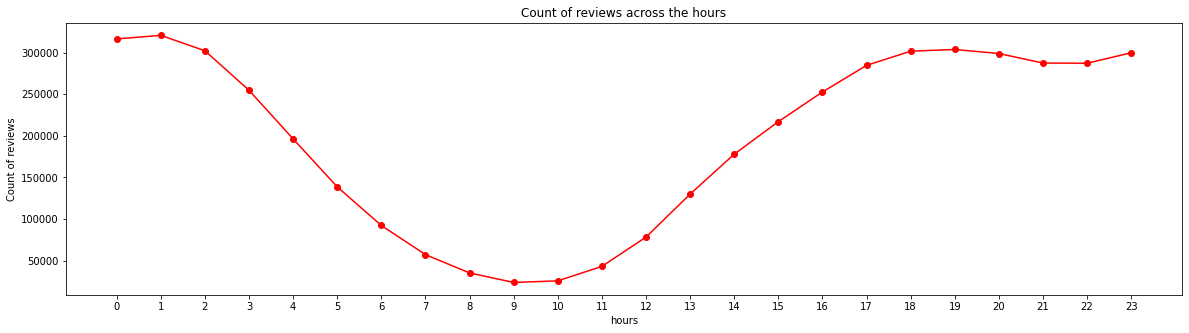

In [ ]:
#Count of reviews across hours of a day
plt.figure(figsize=(20,5))
reviews_df.groupby(reviews_df['date'].dt.hour).size().plot(kind='line',marker='o',color='red')
plt.xticks(sorted(reviews_df['date'].dt.hour.unique()))
plt.xlabel('hours')
plt.ylabel('Count of reviews')
plt.title('Count of reviews across the hours')
plt.show()

The above plot depicts the review count trend over each hour of the day. We see that most reviews are given at 11:00pm-1:00am. And lowest review count happens to happen during morning 9:00 am - 10:00 am

**Users Table**

In [ ]:
user_df.head()

user_id       name  review_count       yelping_since  useful  funny   cool  \
0        0       Jane          1220 2005-03-14 20:26:35   15038  10030  11291   
1        1       Gabi          2136 2007-08-10 19:01:51   21272  10289  18046   
2        2      Jason           119 2007-02-07 15:47:53     188    128    130   
3        3        Kat           987 2009-02-09 16:14:29    7234   4722   4035   
4        4  Christine           495 2008-03-03 04:57:05    1577    727   1124   

                                               elite    friends  fans  \
0       2006,2007,2008,2009,2010,2011,2012,2013,2014   [463996]  1357   
1  2007,2008,2009,2010,2011,2012,2013,2014,2015,2...         []  1025   
2                                          2010,2011  [1094856]    16   
3                      2009,2010,2011,2012,2013,2014         []   420   
4                                     2009,2010,2011         []    47   

   average_stars  compliment_hot  compliment_more  compliment_profile  \
0           3.85            1710              163                 190   
1           4.09            1632               87                  94   
2           3.76              22                1                   3   
3           3.77            1180              129                  93   
4           3.72             248               19                  32   

   compliment_cute  compliment_list  compliment_note  compliment_plain  \
0              361              147             1212              5691   
1              232               96             1187              3293   
2                0                0                5                20   
3              219               90             1120              4510   
4               16               15               77               131   

   compliment_cool  compliment_funny  compliment_writer  compliment_photos  
0             2541              2541                815                323  
1             2205              2205                472                294  
2               31                31                  3                  1  
3             1566              1566                391                326  
4              310               310                 98                 44

In [ ]:
#checking for null values
user_df.isnull().sum()

user_id                     0
name                        0
review_count                0
yelping_since               0
useful                      0
funny                       0
cool                        0
elite                 2094043
friends                     0
fans                        0
average_stars               0
compliment_hot              0
compliment_more             0
compliment_profile          0
compliment_cute             0
compliment_list             0
compliment_note             0
compliment_plain            0
compliment_cool             0
compliment_funny            0
compliment_writer           0
compliment_photos           0
dtype: int64

In [ ]:
user_df.drop('elite',axis=1,inplace=True)

In [ ]:
temp=user_df.groupby('user_id')['review_count'].sum().sort_values(ascending=False)[:10]
list_top_review_users=list(temp.reset_index()['user_id'])
top_10_users_count_reviews=user_df[user_df['user_id'].isin(list_top_review_users)][['name','review_count']]

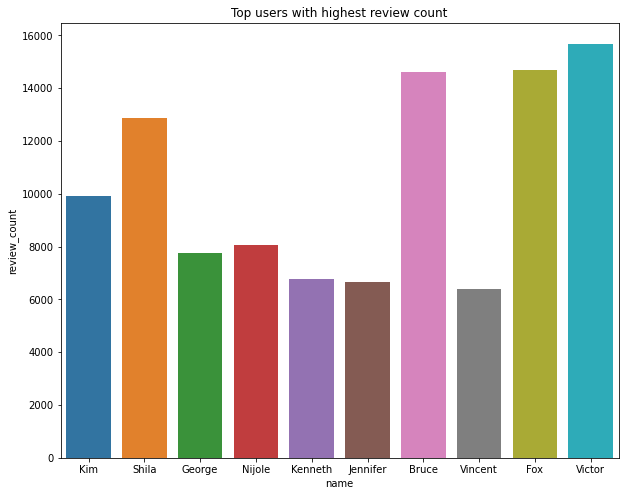

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_users_count_reviews,x='name',y='review_count')
plt.title('Top users with highest review count')
plt.show()

We see that the user victor has given the most reviews on the yelp platform. the above graph depicts the top 10 users with respect to review counts.